In [3]:
#Importing packages
import numpy as np
import math
import pandas as pd
import sympy as sym
import random
import heapq
import random
sym.init_printing()

In [ ]:
#Class and Defining functions
class Game_theory:
    def __init__(self, tab, actions):
        self.actions = actions
        m = np.array(tab, dtype=[("x", object), ("y", object)])
        self.size = int(math.sqrt(len(tab)))
        self.scores = m.reshape(self.size, self.size)

    def Print_game(self):
        game = pd.DataFrame(np.nan, self.actions, self.actions, dtype=object)
        for i in range(self.size):
            for j in range(self.size):
                game.iat[i, j] = self.scores[i][j]
        print(game)
        
def compute_Nash(self):
    max_x = np.matrix(self.scores["x"].max(0)).repeat(self.size, axis=0)
    bool_x = self.scores["x"] == max_x
    max_y = np.matrix(self.scores["y"].max(1)).transpose().repeat(self.size, axis=1)
    bool_y = self.scores["y"] == max_y
    bool_x_y = bool_x & bool_y
    result = np.where(bool_x_y == True)
    position = list(zip(result[0], result[1]))
    return position

In [3]:
battle_of_the_sexes = [(4, 3), (2, 2), (1, 1), (3, 4)]
game_battle_of_sexes = Game_theory(battle_of_the_sexes, ["Dog_race", "Ballet"])

# Position of the Nash equilibriums
position = compute_Nash(game_battle_of_sexes)
print("The position of Nash equilibrium : ")
print(position)

print("The equilibrium events : ")
for event in position:
    print(game_battle_of_sexes.actions[event[0]], game_battle_of_sexes.actions[event[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for event in position:
    print(game_battle_of_sexes.scores[event[0]][event[1]])

The position of Nash equilibrium : 
[(0, 0), (1, 1)]
The equilibrium events : 
Dog_race Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(3, 4)


# Dominant Stratergies

In [4]:
def getDominantStrategies(self, strict="True"):
    dominatedLines = []
    dominatedColumns = []
    findDominated = True
    while (
        findDominated
        and (len(dominatedLines) != self.size - 1)
        and (len(dominatedColumns) != self.size - 1)
    ):
        findDominated = False
        # dominated lines
        for i in range(self.size - 1):
            line1 = self.scores["x"][i]
            line2 = self.scores["x"][i + 1]
            if compare(self, line1, line2, dominatedColumns, strict):
                if i not in dominatedLines:
                    dominatedLines += [i]
                    findDominated = True
            if compare(self, line2, line1, dominatedColumns, strict):
                if i + 1 not in dominatedLines:
                    dominatedLines += [i + 1]
                    findDominated = True
        # dominated columns
        for i in range(self.size - 1):
            c1 = self.scores["y"].transpose()[i]
            c2 = self.scores["y"].transpose()[i + 1]
            if compare(self, c1, c2, dominatedLines, strict):
                if i not in dominatedColumns:
                    dominatedColumns += [i]
                    findDominated = True
            if compare(self, c2, c1, dominatedLines, strict):
                if i + 1 not in dominatedColumns:
                    dominatedColumns += [i + 1]
                    findDominated = True
    return result(self, dominatedLines, dominatedColumns)


def compare(self, l1, l2, tab, strict):
    dominated = True
    for i in range(self.size):
        if strict:
            if (l1[i] < l2[i] and i not in tab) or i in tab:
                dominated = dominated and True
            else:
                dominated = dominated and False
        else:
            if (l1[i] <= l2[i] and i not in tab) or i in tab:
                dominated = dominated and True
            else:
                dominated = dominated and False
    return dominated


def result(self, dominatedLines, dominatedColumns):
    x = list()
    y = list()
    res = list()

    for i in range(self.size):
        if i not in dominatedLines:
            x.append(i)
        if i not in dominatedColumns:
            y.append(i)

    for indX in x:
        for indY in y:
            res.append((indX, indY))
    return res


In [5]:
# We recover the indexes of the non-dominated strategy(ies):
print("Strongly dominated strategies method")
listOfCoordinates = getDominantStrategies(g)
print("Non-dominated strategies indexes : ")
print(listOfCoordinates)

# We print the moves corresponding to these strategies
print("The corresponding rounds : ")
for cor in listOfCoordinates : 
    print(g.actions[cor[0]], g.actions[cor[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for cor in listOfCoordinates : 
    print(g.scores[cor[0]][cor[1]])

print(" ")

# We recover the indexes of the non-dominated strategy(ies)::
print("Weakly dominated strategies method")
listOfCoordinates = getDominantStrategies(g, strict="False")
print("Non-dominated strategies indexes : ")
print(listOfCoordinates)

# We print the moves corresponding to these strategies
print("The corresponding rounds : ")
for cor in listOfCoordinates : 
    print(g.actions[cor[0]], g.actions[cor[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for cor in listOfCoordinates : 
    print(g.scores[cor[0]][cor[1]])

Strongly dominated strategies method
Non-dominated strategies indexes : 
[(0, 0), (0, 1), (1, 0), (1, 1)]
The corresponding rounds : 
Dog_race Dog_race
Dog_race Ballet
Ballet Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(2, 2)
(1, 1)
(3, 4)
 
Weakly dominated strategies method
Non-dominated strategies indexes : 
[(0, 0), (0, 1), (1, 0), (1, 1)]
The corresponding rounds : 
Dog_race Dog_race
Dog_race Ballet
Ballet Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(2, 2)
(1, 1)
(3, 4)


# Mixed Strategies

In [6]:
x, y  = sym.symbols('x, y')
a_11, a_12, a_21, a_22 = sym.symbols('a_11. a_12, a_21, a_22')
b_11, b_12, b_21, b_22 = sym.symbols('b_11, b_12, b_21, b_22')

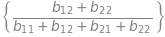

In [7]:
sym.solveset(y * (b_11 + b_21) -((1-y) * (b_12 + b_22)), y)

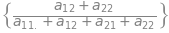

In [8]:
sym.solveset(x * (a_11 + a_21) -((1-x) * (a_12 + a_22)), x)

# Pisoner's Dilemma

In [8]:
COOPERATE = True
DEFECT = False
POINTS = {
    "FALSIFIED" : 0,
    "REWARD" : 3,
    "PUNISHMENT" : 1,
    "GREED" : 5,
}

In [16]:
class Random_Strategy:
    #Randomly choose to coorperate/defect each game
    NAME = "RANDOM"

    def execute(self, opponent):
        return random.choice((COOPERATE, DEFECT))

    def reflect(self, opponent, opponent_action):
        pass

    def reset(self):
        pass

class Always_Defect_Strategy:
    #Always defect
    NAME = "ALWAYS_DEFECT"

    def execute(self, opponent):
        return DEFECT

    def reflect(self, opponent, opponent_action):
        pass

    def reset(self):
        pass


class Always_Cooperate_Strategy:
    #Always cooperate
    NAME = "ALWAYS_COOPERATE"
   
    def execute(self, opponent):
        return COOPERATE

    def reflect(self, opponent, opponent_action):
        pass

    def reset(self):
        pass

class Tit_For_Tat_Strategy:
    NAME = "TIT_FOR_TAT"

    def __init__(self):
        #defiing a set to add those who cheat
        self.cheaters = set()

    def execute(self, opponent):
        if opponent in self.cheaters:
            self.cheaters.remove(opponent)
            return DEFECT
        else:
            return COOPERATE

    def reflect(self, opponent, opponent_action):
        if opponent_action == DEFECT:
            self.cheaters.add(opponent)

    def reset(self):
        self.cheaters = set()


class Exploit_Strategy:
    #Exploit the gullible opponent
    NAME = "EXPLOIT"

    def __init__(self):
        #defining set to add gullible opponents
        self.gullible = set()

    def execute(self, opponent):
        if opponent in self.gullible:
            self.gullible.remove(opponent)

            return DEFECT
        else:
            return COOPERATE

    def reflect(self, opponent, opponent_action):
        if opponent_action == COOPERATE:
            self.gullible.add(opponent)

    def reset(self):
        self.gullible = set()


In [17]:
# A dictionary of all strategies mapped to their names.
STRATEGIES = {
    "RANDOM" : Random_Strategy,
    "ALWAYS_DEFECT" : Always_Defect_Strategy,
    "ALWAYS_COOPERATE" : Always_Cooperate_Strategy,
    "TIT_FOR_TAT" : Tit_For_Tat_Strategy,
    "EXPLOIT" : Exploit_Strategy,
}

# Game

In [18]:
class Simulation:
    def __init__(self,
                 player_count,
                 generation_count,
                 interaction_count,
                 population_shift):
        
        self.next_player_id = 0
        self.players = self.create_palyers(player_count)
        self.generation_count = generation_count
        self.interaction_count = interaction_count
        self.population_shift = population_shift
        
        self.strategy_frequencies = self.initialize_strategy_frequencies()


    def initialize_strategy_frequencies(self):
        #frequencies of strategies
        frequencies = {}
        for strategy in STRATEGIES.keys():
            frequencies[strategy] = []
            
        return frequencies


    def create_palyers(self, player_count):
        players = {}
        players_per_strategy = player_count / len(STRATEGIES)

        if players_per_strategy < 1:
            players_per_strategy = 1
        else:
            players_per_strategy = int(players_per_strategy)

        # Create a balanced number of players for each strategy.
        for name, Strategy in STRATEGIES.items():
            if len(players) >= player_count:
                break

            for player_number in range(0, players_per_strategy):
                players[self.next_player_id] = Player(self.next_player_id, Strategy())
                self.next_player_id += 1

        while len(players) < player_count:
            Strategy = random.choice(list(STRATEGIES.values()))
            players[self.next_player_id] = Player(self.next_player_id, Strategy())
            self.next_player_id += 1

        return players

    
    def play_game(self, player1, player2):
        player1_result = player1.play(player2)
        player2_result = player2.play(player1)
        
        if player1_result == COOPERATE:
            if player2_result == COOPERATE:
                player1.update(POINTS["REWARD"], player2, COOPERATE)
                player2.update(POINTS["REWARD"], player1, COOPERATE)
            elif player2_result == DEFECT:
                player1.update(POINTS["FALSIFIED"], player2, DEFECT)
                player2.update(POINTS["GREED"], player1, COOPERATE)
        elif player1_result == DEFECT:
            if player2_result == COOPERATE:
                player1.update(POINTS["GREED"], player2, COOPERATE)
                player2.update(POINTS["FALSIFIED"], player1, DEFECT)
            elif player2_result == DEFECT:
                player1.update(POINTS["PUNISHMENT"], player2, DEFECT)
                player2.update(POINTS["PUNISHMENT"], player1, DEFECT)


    def reset_players(self):
        for player in self.players.values():
            player.reset()


    def single_generation(self):
        self.reset_players()
        for player_id, player in self.players.items():
            
            # For each player, execute multiple interactions with
            # other players.
            for interaction in range(self.interaction_count):
                other = random.choice(list(self.players.values()))
                while other == player:
                    other = random.choice(list(self.players.values()))
                
                self.play_game(player, other)

        # Add a new generation for each strategy in the frequencies dictionary.
        for category in self.strategy_frequencies.keys():
            self.strategy_frequencies[category].append(0)

        # Count the frequencies of each strategy for this generation.
        for player in self.players.values():
            self.strategy_frequencies[player.strategy.NAME][-1] += 1


    def run(self):
        for generation in range(self.generation_count):
            self.single_generation()

    
    def print_results(self):
        for category in self.strategy_frequencies.keys():
            print(category + ":")
            for generation, count in enumerate(self.strategy_frequencies[category], 1):
                line = "gen {0: >3}, count {1: <3} | {2}"
                print(line.format(generation, count))

class Player:
    def __init__(self, identifier, strategy):
        self.identifier = identifier
        self.strategy = strategy
        self.points = 0

    def __gt__(self, other):
        """Greater than comparison to another player."""
        return self.points > other.points

    def __lt__(self, other):
        """Less than comparison to another player."""
        return self.points < other.points

    def __ge__(self, other):
        """Greater than or equal to comparison to another player."""
        return self.points >= other.points

    def __le__(self, other):
        """Less than or equal to comparison to another player."""
        return self.points <= other.points

    def play(self, opponent):
        """Return the result of the player's strategy, when executed."""
        return self.strategy.execute(opponent)

    def update(self, points, opponent, opponent_action):
        self.points += points
        self.strategy.reflect(opponent, opponent_action)

    def reset(self):
        self.points = 0
        self.strategy.reset()

# Beginning of the program.
if __name__ == "__main__":
    
    PLAYERS = 100
    GENERATIONS = 20
    TURNOVER_DIVISOR = 20
    INTERACTION_MULTIPLIER = 100
    simulation = Simulation(PLAYERS,
                            GENERATIONS,
                            PLAYERS * INTERACTION_MULTIPLIER,
                            PLAYERS // TURNOVER_DIVISOR)
    simulation.run()
    simulation.print_results()


RANDOM:


IndexError: tuple index out of range